# 30 - Experiment 1: figures and tables

In [1]:
from pathlib import Path

# PATHS
METRICS_DIR = Path("20-experiment_1_metrics").resolve() # Or set the path to the metrics extracted from the release archive
METRICS_DIR = Path("../../../../NER-MATERIAL/20-experiment_1_metrics/").resolve() # FIXME TMP

In [2]:
import pandas as pd
import re
import os
import json

def compile_metrics(path): 
    rundirs = [f for f in os.listdir(path) if "run_" in f]

    df = pd.DataFrame()
    for run_dir in rundirs:
        run_path = path / run_dir
        nrun = re.search("\d+",run_dir)[0]
        
        files = [f for f in os.listdir(run_path) if "test_" in f]
        sizes = [int(re.search("\d+",f)[0]) for f in files]
        
        for file, size in zip(files,sizes):
            file_path = run_path / file
            dftmp = pd.read_json(file_path, typ='series')
            dftmp = pd.DataFrame([dftmp])
            
            dftmp["trainsize"] = size 
            dftmp["run"] = nrun
            dftmp["trainsize_p"] = round(100 * size / 6373, 1)
            df = pd.concat([df, dftmp])

    return df.groupby(["run","trainsize"]).first()

# Load SpaCy metrics from metrics jsons
spacy_ner = compile_metrics(METRICS_DIR / "21-spacy_ner")
# Align columns with BERT format
spacy_ner.rename(columns={"ents_p":"eval_precision", "ents_r":"eval_recall", "ents_f":"eval_f1"}, inplace=True)

# Load Camembert metrics from metrics jsons
camembert = compile_metrics(METRICS_DIR / "22-camembert")

# Load Camembert-pretrained metrics from metrics JSONS
camembert_pretrained = compile_metrics(METRICS_DIR / "23-camembert_pretrained")

# Create the full table
metrics_raw = pd.concat([spacy_ner, camembert, camembert_pretrained], keys=["spacy_ner","camembert", "camembert_pretrained"])
metrics_raw

token_acc token_p token_r token_f  \
                     run trainsize                                     
spacy_ner            1   49             None    None    None    None   
                         99             None    None    None    None   
                         199            None    None    None    None   
                         398            None    None    None    None   
                         796            None    None    None    None   
...                                      ...     ...     ...     ...   
camembert_pretrained 4   398             NaN     NaN     NaN     NaN   
                         796             NaN     NaN     NaN     NaN   
                         1593            NaN     NaN     NaN     NaN   
                         3186            NaN     NaN     NaN     NaN   
                         6373            NaN     NaN     NaN     NaN   

                                    eval_precision  eval_recall   eval_f1  \
                     run trainsize                                          
spacy_ner            1   49               0.849251     0.882477  0.865546   
                         99               0.875602     0.906949  0.890999   
                         199              0.896541     0.908459  0.902461   
                         398              0.919915     0.912689  0.916288   
                         796              0.924037     0.916918  0.920464   
...                                            ...          ...       ...   
camembert_pretrained 4   398              0.929832     0.946828  0.938253   
                         796              0.932599     0.946828  0.939660   
                         1593             0.933841     0.944562  0.939171   
                         3186             0.941123     0.946526  0.943817   
                         6373             0.932529     0.945770  0.939103   

                                                                        ents_per_type  \
                     run trainsize                                                      
spacy_ner            1   49         {'PER': {'p': 0.9396602226, 'r': 0.949112426, ...   
                         99         {'PER': {'p': 0.9359347699, 'r': 0.950887574, ...   
                         199        {'PER': {'p': 0.9499705709, 'r': 0.95502958580...   
                         398        {'PER': {'p': 0.9633353046, 'r': 0.96390532540...   
                         796        {'PER': {'p': 0.9535294118000001, 'r': 0.95917...   
...                                                                               ...   
camembert_pretrained 4   398                                                      NaN   
                         796                                                      NaN   
                         1593                                                     NaN   
                         3186                                                     NaN   
                         6373                                                     NaN   

                                           speed  trainsize_p  eval_loss  \
                     run trainsize                                         
spacy_ner            1   49         17716.569436          0.8        NaN   
                         99         17612.334244          1.6        NaN   
                         199        15933.750670          3.1        NaN   
                         398        16171.574093          6.2        NaN   
                         796        15404.793203         12.5        NaN   
...                                          ...          ...        ...   
camembert_pretrained 4   398                 NaN          6.2   0.422793   
                         796                 NaN         12.5   0.401767   
                         1593                NaN         25.0   0.381657   
                         3186                NaN         50.0   0.336832   
                         6

# Build the averaged table


In [3]:
# Store p/r/f1 as percentages
eval_ = ["eval_f1","eval_precision","eval_recall"]
metrics = metrics_raw.copy()
metrics[eval_] = metrics_raw[eval_].multiply(100., axis=1)
metrics.head()

token_acc token_p token_r token_f  eval_precision  \
          run trainsize                                                     
spacy_ner 1   49             None    None    None    None       84.925134   
              99             None    None    None    None       87.560158   
              199            None    None    None    None       89.654144   
              398            None    None    None    None       91.991474   
              796            None    None    None    None       92.403714   

                         eval_recall    eval_f1  \
          run trainsize                           
spacy_ner 1   49           88.247734  86.554560   
              99           90.694864  89.099948   
              199          90.845921  90.246098   
              398          91.268882  91.628753   
              796          91.691843  92.046402   

                                                             ents_per_type  \
          run trainsize                                                      
spacy_ner 1   49         {'PER': {'p': 0.9396602226, 'r': 0.949112426, ...   
              99         {'PER': {'p': 0.9359347699, 'r': 0.950887574, ...   
              199        {'PER': {'p': 0.9499705709, 'r': 0.95502958580...   
              398        {'PER': {'p': 0.9633353046, 'r': 0.96390532540...   
              796        {'PER': {'p': 0.9535294118000001, 'r': 0.95917...   

                                speed  trainsize_p  eval_loss  eval_accuracy  \
          run trainsize                                                        
spacy_ner 1   49         17716.569436          0.8        NaN            NaN   
              99         17612.334244          1.6        NaN            NaN   
              199        15933.750670          3.1        NaN            NaN   
              398        16171.574093          6.2        NaN            NaN   
              796        15404.793203         12.5        NaN            NaN   

                         eval_runtime  eval_samples_per_second  \
          run trainsize                                          
spacy_ner 1   49                  NaN                      NaN   
              99                  NaN                      NaN   
              199                 NaN                      NaN   
              398                 NaN                      NaN   
              796                 NaN                      NaN   

                         eval_steps_per_second  epoch  
          run trainsize                                
spacy_ner 1   49                           NaN    NaN  
              99                           NaN    NaN  
              199                          NaN    NaN  
              398                          NaN    NaN  
              796                          NaN    NaN

In [34]:
# Average over runs
averaged = metrics.groupby(level=0).apply(lambda grp: grp.groupby(by="trainsize").mean())
averaged.set_index(["trainsize_p"], append=True,inplace=True)

# Keep just the necessary columns
averaged=averaged[["eval_precision","eval_recall","eval_f1"]]

# Set pretty names
averaged.index.names = ['Model','Trainset Size',"%"]
averaged.rename(columns={"eval_precision": "Precision", "eval_recall": "Recall", "eval_f1":"F1 score"}, errors="raise", inplace=True)
averaged.rename(mapper={"camembert": "Camembert","camembert_pretrained":"Camembert-pretrained","spacy_ner":"SpaCy NER"}, errors="ignore", inplace=True, axis=0)
averaged

Precision     Recall   F1 score
Model                Trainset Size %                                     
Camembert            49            0.8    87.410761  91.604230  89.456831
                     99            1.6    88.655054  92.474320  90.522085
                     199           3.1    91.544400  93.915408  92.714243
                     398           6.2    92.716905  93.891239  93.299850
                     796           12.5   93.329497  94.897281  94.106668
                     1593          25.0   94.852461  94.854985  94.853115
                     3186          50.0   93.854951  95.398792  94.620186
                     6373          100.0  95.084464  95.093656  95.086861
Camembert-pretrained 49            0.8    91.196274  93.723565  92.435117
                     99            1.6    91.868319  94.010574  92.925420
                     199           3.1    92.945755  94.410876  93.671435
                     398           6.2    92.991175  94.686556  93.830369
                     796           12.5   92.982131  94.622356  93.794365
                     1593          25.0   93.198879  94.796073  93.990399
                     3186          50.0   94.166867  94.977341  94.570141
                     6373          100.0  93.882974  94.856495  94.366900
SpaCy NER            49            0.8    85.555070  88.586103  87.043738
                     99            1.6    87.651826  90.377644  88.992014
                     199           3.1    89.967866  90.731118  90.346384
                     398           6.2    91.983337  91.722054  91.851640
                     796           12.5   92.396052  91.885196  92.139751
                     1593          25.0   92.847962  92.755287  92.801576
                     3186          50.0   93.089527  93.344411  93.216490
                     6373          100.0  93.679900  93.362538  93.519860

# Create the results table
Title: "Experimental results of the NER models performances when trained on varying numbers of examples"

In [35]:
# Filter and transpose to obtain the latex table
latex_table = averaged.stack().unstack(level=[1,2])

# Swap model name and metrics to get a nice table
latex_table = latex_table.swaplevel(0,1).sort_index(level=0)

caption = "Experimental results of the NER models performances when trained on varying numbers of examples"
print(latex_table.to_latex(float_format="%.1f", multirow=True, caption=caption))
latex_table

\begin{table}
\centering
\caption{Experimental results of the NER models performances when trained on varying numbers of examples}
\begin{tabular}{llrrrrrrrr}
\toprule
       & Trainset Size &  49   &  99   &  199  &  398  &  796  &  1593 &  3186 &  6373 \\
       & \% & 0.8   & 1.6   & 3.1   & 6.2   & 12.5  & 25.0  & 50.0  & 100.0 \\
{} & Model &       &       &       &       &       &       &       &       \\
\midrule
\multirow{3}{*}{F1 score} & Camembert &  89.5 &  90.5 &  92.7 &  93.3 &  94.1 &  94.9 &  94.6 &  95.1 \\
       & Camembert-pretrained &  92.4 &  92.9 &  93.7 &  93.8 &  93.8 &  94.0 &  94.6 &  94.4 \\
       & SpaCy NER &  87.0 &  89.0 &  90.3 &  91.9 &  92.1 &  92.8 &  93.2 &  93.5 \\
\cline{1-10}
\multirow{3}{*}{Precision} & Camembert &  87.4 &  88.7 &  91.5 &  92.7 &  93.3 &  94.9 &  93.9 &  95.1 \\
       & Camembert-pretrained &  91.2 &  91.9 &  92.9 &  93.0 &  93.0 &  93.2 &  94.2 &  93.9 \\
       & SpaCy NER &  85.6 &  87.7 &  90.0 &  92.0 &  92.4 &  92.8 &  93

Trainset Size                        49         99         199        398   \
%                                   0.8        1.6        3.1        6.2     
          Model                                                              
F1 score  Camembert             89.456831  90.522085  92.714243  93.299850   
          Camembert-pretrained  92.435117  92.925420  93.671435  93.830369   
          SpaCy NER             87.043738  88.992014  90.346384  91.851640   
Precision Camembert             87.410761  88.655054  91.544400  92.716905   
          Camembert-pretrained  91.196274  91.868319  92.945755  92.991175   
          SpaCy NER             85.555070  87.651826  89.967866  91.983337   
Recall    Camembert             91.604230  92.474320  93.915408  93.891239   
          Camembert-pretrained  93.723565  94.010574  94.410876  94.686556   
          SpaCy NER             88.586103  90.377644  90.731118  91.722054   

Trainset Size                        796        1593       3186       6373  
%                                   12.5       25.0       50.0       100.0  
          Model                                                             
F1 score  Camembert             94.106668  94.853115  94.620186  95.086861  
          Camembert-pretrained  93.794365  93.990399  94.570141  94.366900  
          SpaCy NER             92.139751  92.801576  93.216490  93.519860  
Precision Camembert             93.329497  94.852461  93.854951  95.084464  
          Camembert-pretrained  92.982131  93.198879  94.166867  93.882974  
          SpaCy NER             92.396052  92.847962  93.089527  93.679900  
Recall    Camembert             94.897281  94.854985  95.398792  95.093656  
          Camembert-pretrained  94.622356  94.796073  94.977341  94.856495  
          SpaCy NER             91.885196  92.755287  93.344411  93.362538

# Create the graphs

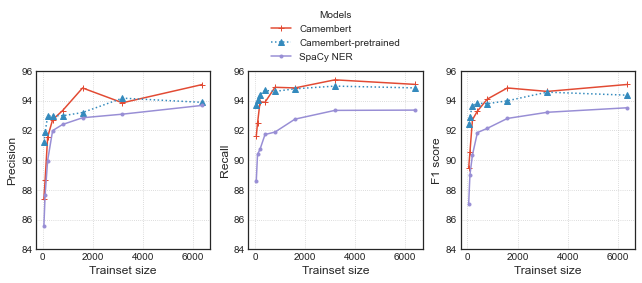

In [40]:
plt.style.use('seaborn-white')  # Nicer plots

averaged = metrics.groupby(level=0).apply(lambda grp: grp.groupby(by="trainsize").mean())
averaged.rename(columns={"eval_precision": "Precision", "eval_recall": "Recall", "eval_f1":"F1 score"}, errors="raise", inplace=True)
averaged.rename(mapper={"camembert": "Camembert","camembert_pretrained":"Camembert-pretrained","spacy_ner":"SpaCy NER"}, errors="ignore", inplace=True, axis=0)


# Keep just the necessary columns
averaged=averaged[["Precision","Recall","F1 score"]]
prec = averaged["Precision"].unstack().T
recall = averaged["Recall"].unstack().T
f1 = averaged["F1 score"].unstack().T

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, sharex='row', figsize=(9, 3))
fig.tight_layout()

# plot subplots
ls=['+-','^:','.-']
ax1 = prec.plot(ax=axes[0], xlabel="Trainset size", ylabel="Precision", legend=False, style=ls)
ax2 = recall.plot(ax=axes[1], xlabel="Trainset size",ylabel="Recall", legend=False, style=ls)
ax3 = f1.plot(ax=axes[2], xlabel="Trainset size",ylabel="F1 score", legend=False, style=ls)

# Align y ticks
ax1.set_yticks(ax1.get_yticks())
ax2.set_yticks(ax1.get_yticks())
ax3.set_yticks(ax1.get_yticks())

                           
# Set shared legend above the plots
ax2.legend(loc="lower center",   # Position of legend
           title="Models",  # Title for the legend
           bbox_to_anchor=(0.5, 1)
           )

ax1.grid(linestyle='dotted')
ax2.grid(linestyle='dotted')
ax3.grid(linestyle='dotted')

plt.savefig('experiment-1-models-performances.pdf', dpi=300, format='pdf',bbox_inches='tight')